<a href="https://colab.research.google.com/github/Ishita-Mangal/Bulldozer-Sales-Price-Prediction/blob/main/BullDozer_SalesPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [94]:
# Import training data
# Working with time series data, we want to enrich the time & date component as much as possible. This can be enabled by commanding the date columns to be parsed (conversion to a datetime datatype) using  `parse_dates` parameter.

train_df = pd.read_csv('/content/Train.csv', low_memory=False, parse_dates=['saledate'])

train_df.head()
print(train_df.dtypes['saledate'])

datetime64[ns]


## Inspecting data

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [96]:
train_df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,401125
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,2004-08-02 07:47:13.986413184
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-10-07 00:00:00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-03-23 00:00:00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03,2009-03-24 00:00:00
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,2011-12-30 00:00:00
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN


## Check misisng values

In [97]:
train_df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,258360
UsageBand,331486
saledate,0


In [98]:
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [99]:
train_df.duplicated().sum()

np.int64(0)

In [100]:
train_df.dtypes.sort_values()


,0
SalesID,int64
SalePrice,int64
MachineID,int64
ModelID,int64
datasource,int64
YearMade,int64
auctioneerID,float64
MachineHoursCurrentMeter,float64
saledate,datetime64[ns]
Coupler,object


## Relationship between sale year and sale price.

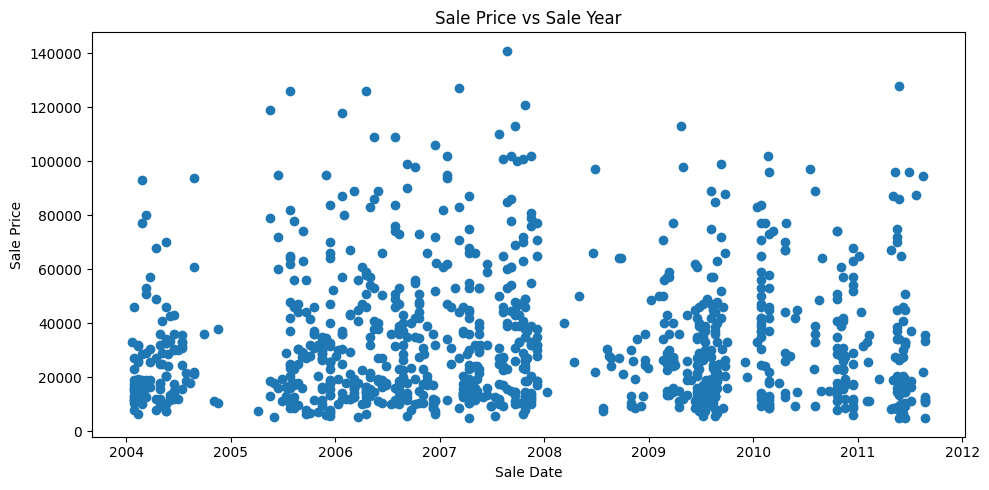

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(train_df["saledate"][:1000], train_df["SalePrice"][:1000])
ax.set_title("Sale Price vs Sale Year")
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price")
plt.tight_layout()

## Distribution of bulldozer sale prices.

Text(0, 0.5, 'Count')

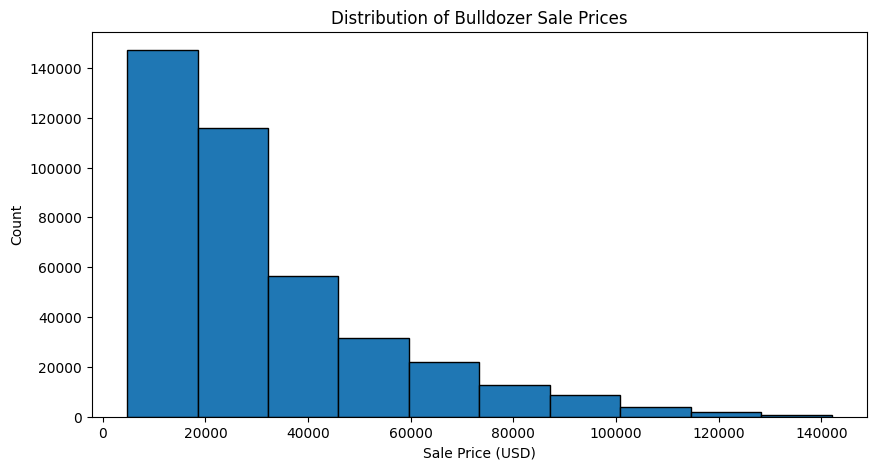

In [102]:
train_df.SalePrice.plot.hist( figsize=(10,5), edgecolor='black')
plt.title('Distribution of Bulldozer Sale Prices')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')

High bar on the left shows that most bulldozers are sold at lower prices.

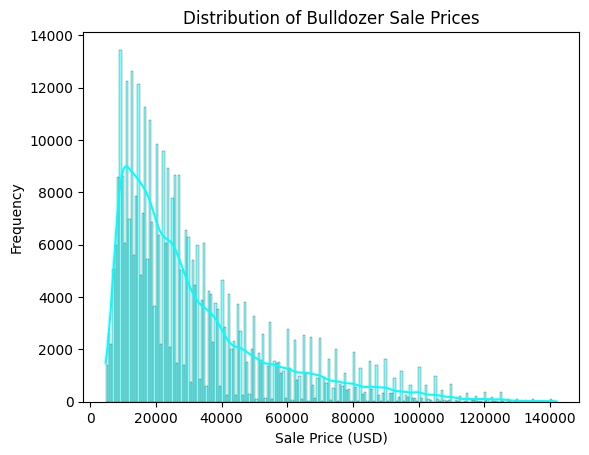

In [103]:
sns.histplot(train_df['SalePrice'], kde=True, color='cyan')
plt.title("Distribution of Bulldozer Sale Prices")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Frequency")
plt.show()

The distribution of SalePrice is right-skewed and non-normal. Applying a log transformation will help stabilize variance and improve model performance.

In [104]:
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])  # For model stability

In [105]:
summary = pd.DataFrame({
    'Data Type': train_df.dtypes,
    'Num Unique': train_df.nunique(),
    'Missing %': train_df.isnull().mean() * 100
}).sort_values(by='Data Type')

summary.head(20)  # See first 20 columns

,Data Type,Num Unique,Missing %
SalesID,int64,401125,0.000000
SalePrice,int64,899,0.000000
MachineID,int64,341027,0.000000
ModelID,int64,5218,0.000000
datasource,int64,5,0.000000
saledate,datetime64[ns],3919,0.000000
YearMade,int64,72,0.000000
SalePrice_log,float64,899,0.000000
MachineHoursCurrentMeter,float64,15152,64.408850
auctioneerID,float64,30,5.019882


In [106]:
missing_ratio = train_df.isnull().mean()
high_missing = missing_ratio[missing_ratio > 0.9].index
print("Highly missing columns:", high_missing.tolist())

# Drop if not valuable
train_df.drop(high_missing, axis=1, inplace=True)
train_df.info


Highly missing columns: ['Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control']


<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246      66000     999089     3157         121           3.0   
1       1139248      57000     117657       77         121           3.0   
2       1139249      10000     434808     7009         121           3.0   
3       1139251      38500    1026470      332         121           3.0   
4       1139253      11000    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
401120  6333336      10500    1840702    21439         149           1.0   
401121  6333337      11000    1830472    21439         149           1.0   
401122  6333338      11500    1887659    21439         149           1.0   
401123  6333341       9000    1903570    21435         149           2.0   
401124  6333342       7750    1926965    21435         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
0           2004                      68.0       Low 2006-11-16  ...   
1           1996                    4640.0       Low 2004-03-26  ...   
2           2001                    2838.0      High 2004-02-26  ...   
3           2001                    3486.0      High 2011-05-19  ...   
4           2007                     722.0    Medium 2009-07-23  ...   
...          ...                       ...       ...        ...  ...   
401120      2005                       NaN       NaN 2011-11-02  ...   
401121      2005                       NaN       NaN 2011-11-02  ...   
401122      2005                       NaN       NaN 2011-11-02  ...   
401123      2005                       NaN       NaN 2011-10-25  ...   
401124      2005                       NaN       NaN 2011-10-25  ...   

               Stick_Length                Thumb      Pattern_Changer  \
0                       NaN                  NaN                  NaN   
1                       NaN                  NaN                  NaN   
2                       NaN                  NaN                  NaN   
3                       NaN                  NaN                  NaN   
4                       NaN                  NaN                  NaN   
...                     ...                  ...                  ...   
401120  None or Unspecified  None or Unspecified  None or Unspecified   
401121  None or Unspecified  None or Unspecified  None or Unspecified   
401122  None or Unspecified  None or Unspecified  None or Unspecified   
401123  None or Unspecified  None or Unspecified  None or Unspecified   
401124  None or Unspecified  None or Unspecified  None or Unspecified   

       Grouser_Type Backhoe_Mounting Blade_Type Travel_Controls  \
0               NaN              NaN        NaN             NaN   
1               NaN              NaN        NaN             NaN   
2               NaN              NaN        NaN             NaN   
3               NaN              NaN        NaN             NaN   
4               NaN              NaN        NaN             NaN   
...             ...              ...        ...             ...   
401120       Double              NaN        NaN             NaN   
401121       Double              NaN        NaN             NaN   
401122       Double              NaN        NaN             NaN   
401123       Double              NaN        NaN             NaN   
401124       Double              NaN        NaN             NaN   

       Differential_Type Steering_Controls SalePrice_log  
0               Standard      Conventional     11.097425  
1               Standard      Conventional     10.950824  
2                    NaN               NaN      9.210440  
3                    NaN               NaN     10.558439  
4                    NaN               NaN      9.305741  
...                  ...               ...           ...  
401120               NaN               NaN      9.259226  
401121               NaN            

## Sort data by Sales date as it is as time series data

In [107]:
train_df.sort_values(by='saledate',inplace=True)
train_df['saledate'].head(10)

,saledate
205615,1989-01-17
92803,1989-01-31
98346,1989-01-31
169297,1989-01-31
274835,1989-01-31
75378,1989-01-31
81383,1989-01-31
134080,1989-01-31
55455,1989-01-31
55454,1989-01-31


## Add datetime parameters for saledate column

In [108]:
train_df['year'] = train_df['saledate'].dt.year
train_df['month'] = train_df['saledate'].dt.month
train_df['day'] = train_df['saledate'].dt.day
train_df['dayofweek'] = train_df['saledate'].dt.dayofweek
train_df['dayofyear'] = train_df['saledate'].dt.dayofyear
#drop actual saledate col
train_df.drop(columns='saledate',inplace=True)
train_df.columns.to_list()

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Hydraulics',
 'Ripper',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'SalePrice_log',
 'year',
 'month',
 'day',
 'dayofweek',
 'dayofyear']

## Make a copy of sorted and parsed dates DataFrame

In [109]:
df1=train_df.copy()
df1.to_csv('copy_df.csv', index=False)

## List of columns having missing values

In [110]:
df1.isna().sum()[df1.isna().sum()>0].sort_values(ascending=False)

,0
Hydraulics_Flow,357763
Grouser_Tracks,357763
Coupler_System,357667
fiModelSeries,344217
Steering_Controls,331756
Differential_Type,331714
UsageBand,331486
fiModelDescriptor,329206
Backhoe_Mounting,322453
Stick,321991


In [111]:
missing_ratio = df1.isnull().mean()
high_missing = missing_ratio[missing_ratio > 0.6].index
print("Highly missing columns:", high_missing.tolist())

Highly missing columns: ['MachineHoursCurrentMeter', 'UsageBand', 'fiModelSeries', 'fiModelDescriptor', 'Drive_System', 'Pad_Type', 'Ride_Control', 'Stick', 'Turbocharged', 'Ripper', 'Tire_Size', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


Check which columns contain strings.

In [112]:
string_cols = df1.select_dtypes(include='object').columns
print(string_cols)

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Hydraulics', 'Ripper',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')


For binary or low-unique-count categorical columns — fill with mode

In [165]:
for col in string_cols:
    if df1[col].nunique() <= 10 and df1[col].isna().sum() > 0:
        mode_val = df1[col].mode()[0]
        df1[col].fillna(mode_val, inplace=True)


Label Encoding:Convert the list of string values into categorical (numerical)

In [114]:
for col in string_cols:
    df1[col] = df1[col].fillna('Missing')
    df1[col] = df1[col].astype('category').cat.codes
df1.dtypes[df1.dtypes == 'object']
# df1.info()
string_cols.isna().sum()

np.int64(0)

In [115]:
(df1.isnull().sum() / len(df1) * 100).sort_values(ascending=False)

,0
MachineHoursCurrentMeter,64.408850
auctioneerID,5.019882
SalesID,0.000000
MachineID,0.000000
SalePrice,0.000000
datasource,0.000000
ModelID,0.000000
YearMade,0.000000
UsageBand,0.000000
fiModelDesc,0.000000


Check which columns contain numericals.

In [116]:
num_cols = df1.select_dtypes(include=['int','float']).columns
# print(num_cols)
for col in num_cols:
  if df1[col].isna().sum()>0:
    print(f"{col}: {df1[col].isna().sum()} missing")
    median_val = df1[col].median()
    df1.fillna({col:median_val}, inplace=True)
num_cols.isna().sum()

auctioneerID: 20136 missing
MachineHoursCurrentMeter: 258360 missing


np.int64(0)

Missing values percentage

In [117]:
(df1.isnull().sum() / len(df1) * 100).sort_values(ascending=False)

,0
SalesID,0.0
SalePrice,0.0
MachineID,0.0
ModelID,0.0
datasource,0.0
auctioneerID,0.0
YearMade,0.0
MachineHoursCurrentMeter,0.0
UsageBand,0.0
fiModelDesc,0.0


In [118]:
# Drop unique identifiers
df1.drop(['SalesID', 'MachineID'], axis=1, inplace=True)
low_var_cols = [col for col in df1.columns if df1[col].nunique() <= 1]
df1.drop(low_var_cols, axis=1, inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 401125 non-null  int64  
 1   ModelID                   401125 non-null  int64  
 2   datasource                401125 non-null  int64  
 3   auctioneerID              401125 non-null  float64
 4   YearMade                  401125 non-null  int64  
 5   MachineHoursCurrentMeter  401125 non-null  float64
 6   UsageBand                 401125 non-null  int8   
 7   fiModelDesc               401125 non-null  int16  
 8   fiBaseModel               401125 non-null  int16  
 9   fiSecondaryDesc           401125 non-null  int16  
 10  fiModelSeries             401125 non-null  int8   
 11  fiModelDescriptor         401125 non-null  int16  
 12  ProductSize               401125 non-null  int8   
 13  fiProductClassDesc        401125 non-null  i

Machine Age Feature

In [119]:
df1['machine_age'] = df1['year'] - df1['YearMade']
df1['machine_age']

,machine_age
205615,15
92803,3
98346,14
169297,11
274835,9
...,...
393123,1011
397987,1011
392664,23
400458,1


Outlier identification

In [120]:
# Redefine num_cols after dropping columns
num_cols = df1.select_dtypes(include=['int','float']).columns

outlier_dict = {}

for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    if len(outliers) > 0:
        outlier_dict[col] = len(outliers)

In [121]:
for col, count in outlier_dict.items():
    print(f"{col}: {count} outliers")


SalePrice: 22615 outliers
ModelID: 37322 outliers
datasource: 64882 outliers
auctioneerID: 55281 outliers
YearMade: 38795 outliers
MachineHoursCurrentMeter: 69639 outliers
dayofweek: 70969 outliers
machine_age: 44560 outliers


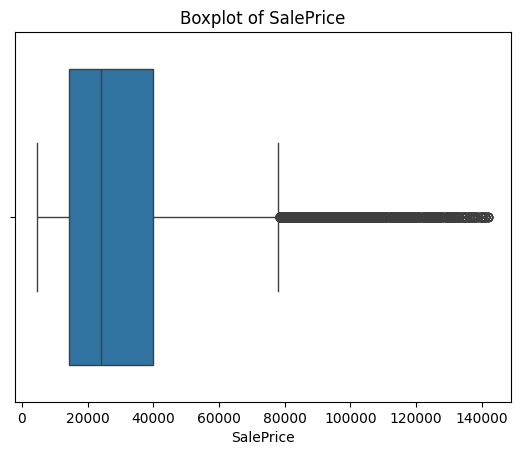

In [122]:
sns.boxplot(x=df1['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

In [123]:
df2=df1.copy()
df2.to_csv('copy_df1.csv', index=False)


In [124]:
df2.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Travel_Controls,Differential_Type,Steering_Controls,SalePrice_log,year,month,day,dayofweek,dayofyear,machine_age
205615,9500,8434,132,18.0,1974,0.0,2,4536,1734,100,...,5,3,1,9.159152,1989,1,17,1,17,15
92803,24000,7110,132,99.0,1986,0.0,2,734,242,100,...,5,3,1,10.085851,1989,1,31,1,31,3
98346,35000,3357,132,99.0,1975,0.0,2,81,18,56,...,5,3,1,10.463132,1989,1,31,1,31,14
169297,19000,8247,132,99.0,1978,0.0,2,1157,348,100,...,5,3,1,9.852247,1989,1,31,1,31,11
274835,14000,10150,132,99.0,1980,0.0,2,1799,556,100,...,5,3,1,9.546884,1989,1,31,1,31,9


In [125]:
df2.year.value_counts().sort_index()

,count
year,
1989,4806
1990,4529
1991,5109
1992,5519
1993,6303
1994,7929
1995,8530
1996,8829
1997,9785


##**Model Building**
Importing train_valid and valid data

In [126]:
train_valid= pd.read_csv('/content/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])
train_valid.head()
train_valid.saledate.value_counts().sort_index()
train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [127]:
valid=pd.read_csv('/content/Valid.csv',low_memory=False,parse_dates=['saledate'])
valid.head()
valid.saledate.value_counts().sort_index()
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  4739 non-null   float64       
 7   UsageBand                 4031 non-null   object        
 8   saledate                  11573 non-null  datetime64[ns]
 9   fiModelDesc               11573 non-null  object        
 10  fiBaseModel               11573 non-null  object        
 11  fiSecondaryDesc           8037 non-null   object        
 12  fiModelSeries     

Preprocess function

In [128]:
def preprocess(df):
    # Convert saledate to datetime (if not already)
    df['saledate'] = pd.to_datetime(df['saledate'])

    #  Feature extraction from saledate
    df['year'] = df['saledate'].dt.year
    df['month'] = df['saledate'].dt.month
    df['day'] = df['saledate'].dt.day
    df['dayOfWeek'] = df['saledate'].dt.dayofweek
    df['dayOfYear'] = df['saledate'].dt.dayofyear

    #  Drop raw saledate
    df.drop(columns='saledate', inplace=True)

    #  Fill missing numerical columns with median
    for col in df.select_dtypes(include=['int', 'float']).columns:
        df[col] = df[col].fillna(df[col].median())

    #  Fill missing categorical columns with mode, encode
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = df[col].astype('category').cat.codes

    #  Derived feature: machine age
    df['machine_age'] = df['year'] - df['YearMade']

    #  Drop ID columns (if still present)
    for id_col in ['SalesID', 'MachineID']:
        if id_col in df.columns:
            df.drop(id_col, axis=1, inplace=True)

    #  Drop columns with >90% missing values
    missing_ratio = df.isnull().mean()
    high_missing = missing_ratio[missing_ratio > 0.9].index
    print("Dropping highly missing columns:", high_missing.tolist())
    df.drop(high_missing, axis=1, inplace=True)

    return df


In [129]:
print(train_valid.columns)

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')


In [130]:
train_valid = preprocess(train_valid)

Dropping highly missing columns: []


##Split Features & Target

In [131]:
from sklearn.model_selection import train_test_split

X = train_valid.drop('SalePrice', axis=1)
y = train_valid['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)



In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


In [133]:
print((y_valid <= 0).sum())  # how many zero or negative values

from sklearn.metrics import mean_squared_log_error
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_valid)

print((pred_lr <= 0).sum())  # predictions that are zero or negative
def rmsle(y_true, y_pred):
    # Convert to arrays just in case
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Mask out zero or negative predictions and labels
    mask = (y_true > 0) & (y_pred > 0)

    # Apply mask
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    return np.sqrt(mean_squared_log_error(y_true, y_pred))



mse = mean_squared_error(y_valid, pred_lr)
print("MSE:", mse)
print("Linear Regression RMSLE Training:", rmsle(y_valid, pred_lr))

0
254
MSE: 332410466.43744427
Linear Regression RMSLE Training: 0.5895970541363339


In [134]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_valid)

print("Random Forest RMSLE Training:", rmsle(y_valid, preds_rf))

Random Forest RMSLE Training: 0.21607114650205633


Random Forest is more efficient ,so final model is Random Forest Regressor

Make Predictions on valid.csv

In [135]:
print(valid.columns)

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')


Preprocess the valid.csv

In [138]:
valid = preprocess(valid)

Dropping highly missing columns: []


 Match Columns

In [139]:
# Ensure test data has same columns (add missing with default 0)
for col in X_train.columns:
    if col not in valid.columns:
        valid[col] = 0

# Reorder columns to match training set
valid = valid[X_train.columns]


Make Predictions

In [140]:
predictions_valid = rf.predict(valid)

Error checking from given ValidSolution file

In [141]:
ValidSolution=pd.read_csv('/content/ValidSolution.csv')
actual_valid= ValidSolution['SalePrice']
print("Random Forest RMSLE Validation :", rmsle(actual_valid,predictions_valid ))

Random Forest RMSLE Validation : 0.6098672815512478


Prepare the Submission File

In [142]:
valid_raw=pd.read_csv('/content/Valid.csv')
# valid_raw.head()
valid_sol = pd.DataFrame({
    'SalesID': valid_raw['SalesID'],
    'SalePrice': predictions_valid
    # "Usage': 'Public Test'
})

Save to CSV:

In [143]:
valid_sol.to_csv("valid_solution.csv", index=False)


## Make Prediction on Test data

In [144]:
test=pd.read_csv('/content/Test.csv')
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [145]:
test.columns.tolist()

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

Clean and preprocess test file using predefine function

In [146]:
test=preprocess(test)

Dropping highly missing columns: []


Match columns of train_valid and test data

In [147]:
# Ensure test data has same columns (add missing with default 0)
for col in X_train.columns:
    if col not in test.columns:
        test[col] = 0

# Reorder columns to match training set
test = test[X_train.columns]

Make prediction on Test using Random Forest Regressor

In [148]:
test_pred= rf.predict(test)

In [149]:
TestPred= pd.read_csv("/content/test_predictions.csv")
TestPred.head()
actual_test= TestPred['SalesPrice']
print("Random Forest RMSLE Test :", rmsle(actual_test,test_pred ))

Random Forest RMSLE Test : 0.328724164642527


Submission file

In [150]:
test_raw=pd.read_csv('/content/Test.csv')
test_predictions = pd.DataFrame({
    'SalesID': test_raw['SalesID'],
    'SalePrice': test_pred
})


In [151]:
test_predictions.to_csv("test_preds.csv", index=False)


##  Feature Importance Plot

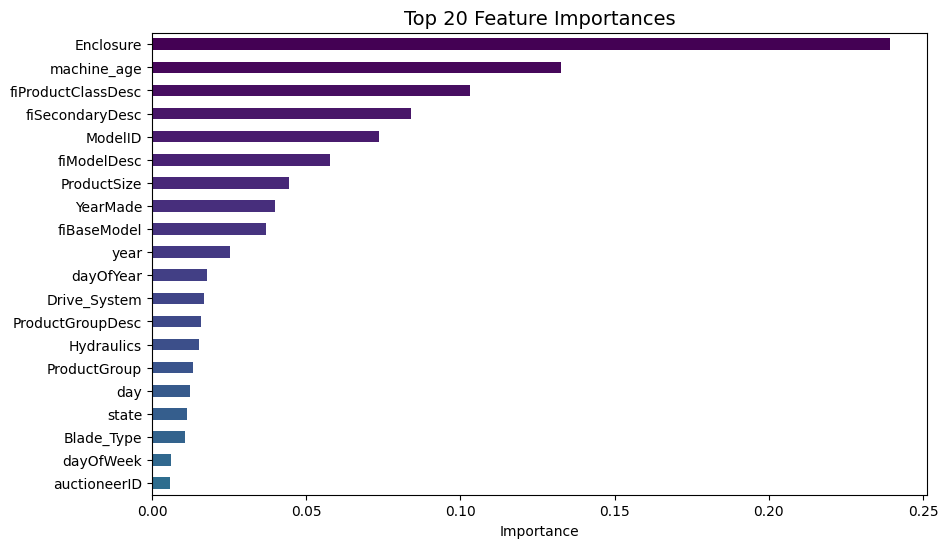

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf is your RandomForest model
importances = rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(feat_imp)))


feat_imp.head(20).plot(kind='barh', figsize=(10, 6),color=colors)
plt.title("Top 20 Feature Importances", fontsize=14)
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()
